# US Accidents Data Analysis

This notebook analyzes US traffic accident data to identify patterns, hotspots, and contributing factors.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Load the Data

In [2]:
# Load the dataset
df = pd.read_csv('../data/US_Accidents.csv')

# Display basic info
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


## 2. Data Exploration

In [8]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Severity           int64         
 1   Start_Time         datetime64[ns]
 2   Weather_Condition  object        
 3   Temperature(F)     float64       
 4   Visibility(mi)     float64       
 5   State              object        
 6   City               object        
 7   Start_Lat          float64       
 8   Start_Lng          float64       
 9   Hour               float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 589.6+ MB


In [9]:
# Statistical summary
df.describe()

,Severity,Start_Time,Temperature(F),Visibility(mi),Start_Lat,Start_Lng,Hour
count,7.728394e+06,6985228,7.564541e+06,7.551296e+06,7.728394e+06,7.728394e+06,6.985228e+06
mean,2.212384e+00,2020-03-21 21:49:59.056443136,6.166329e+01,9.090376e+00,3.620119e+01,-9.470255e+01,1.226779e+01
min,1.000000e+00,2016-01-14 20:18:33,-8.900000e+01,0.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00
25%,2.000000e+00,2018-09-17 02:20:31.750000128,4.900000e+01,1.000000e+01,3.339963e+01,-1.172194e+02,8.000000e+00
50%,2.000000e+00,2020-06-23 13:37:23.500000,6.400000e+01,1.000000e+01,3.582397e+01,-8.776662e+01,1.300000e+01
75%,2.000000e+00,2021-10-28 15:44:07,7.600000e+01,1.000000e+01,4.008496e+01,-8.035368e+01,1.700000e+01
max,4.000000e+00,2023-03-31 23:30:00,2.070000e+02,1.400000e+02,4.900220e+01,-6.711317e+01,2.300000e+01
std,4.875313e-01,NaN,1.901365e+01,2.688316e+00,5.076079e+00,1.739176e+01,5.455518e+00


## 2. Data Cleaning

In [10]:
df.isnull().sum()


Severity                  0
Start_Time           743166
Weather_Condition    173459
Temperature(F)       163853
Visibility(mi)       177098
State                     0
City                    253
Start_Lat                 0
Start_Lng                 0
Hour                 743166
dtype: int64

In [11]:
df = df[['Severity','Start_Time','Weather_Condition',
         'Temperature(F)','Visibility(mi)',
         'State','City','Start_Lat','Start_Lng']]


In [12]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour


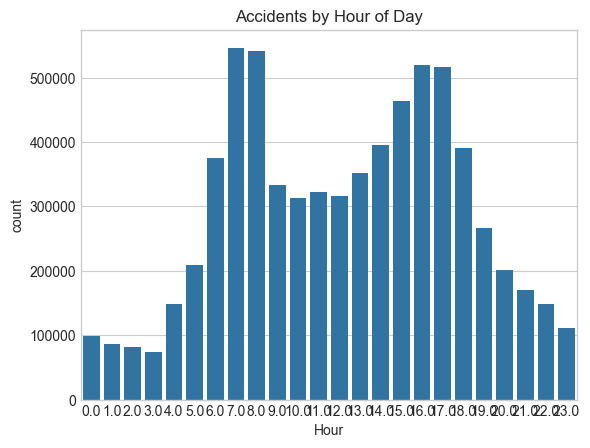

In [13]:
sns.countplot(x='Hour', data=df)
plt.title("Accidents by Hour of Day")
plt.show()


## 3.Time of Day Analysis ⏰

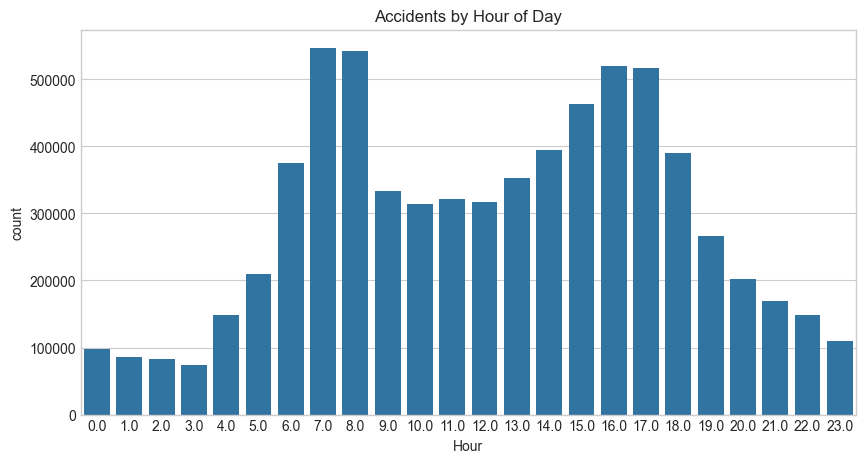

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title("Accidents by Hour of Day")
plt.show()


## 4. Weather Analysis 🌧️

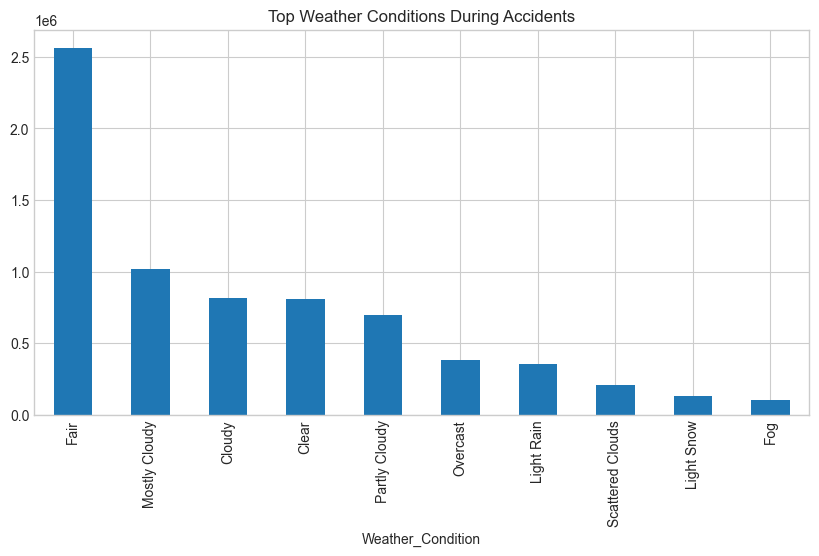

In [15]:
top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_weather.plot(kind='bar')
plt.title("Top Weather Conditions During Accidents")
plt.show()


## 5. Accident Severity Analysis 🚨

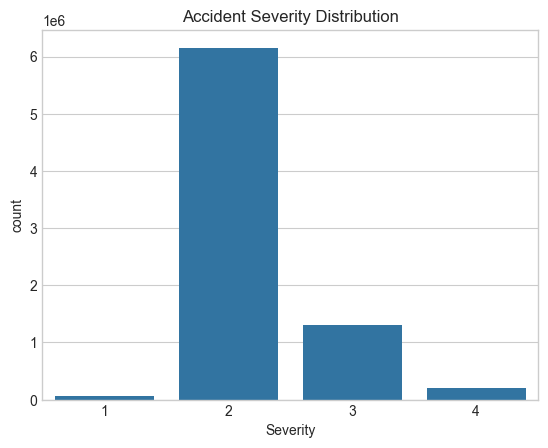

In [16]:
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()


## 6.Accidents by Day of Week 📅

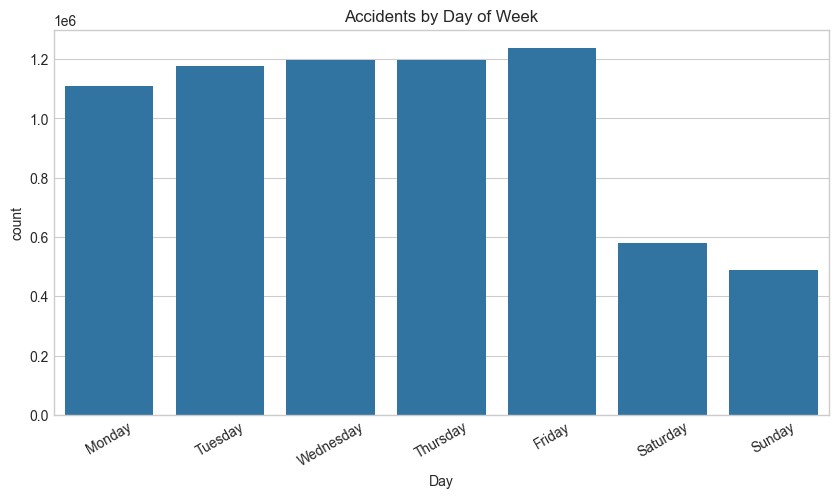

In [18]:
df['Day'] = df['Start_Time'].dt.day_name()

plt.figure(figsize=(10,5))
sns.countplot(
    x='Day',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title("Accidents by Day of Week")
plt.xticks(rotation=30)
plt.show()


## 7. Accidents by State (Top 10) 🗺️

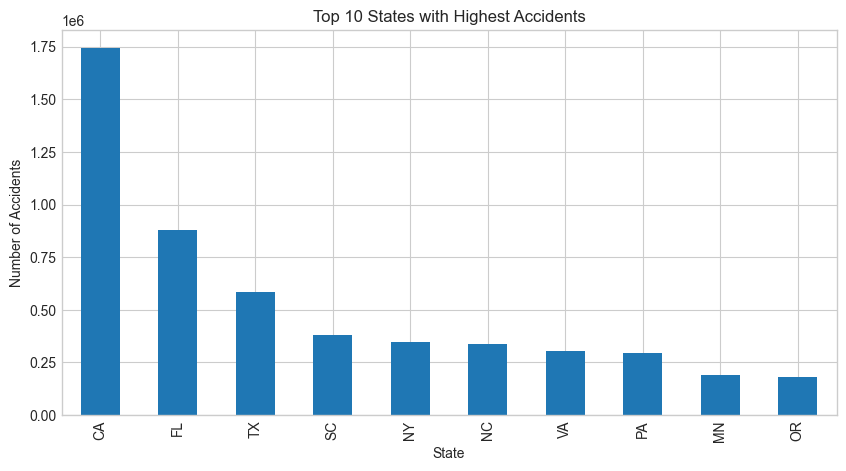

In [19]:
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_states.plot(kind='bar')
plt.title("Top 10 States with Highest Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


## 8.Temperature vs Accident Severity 🌡️

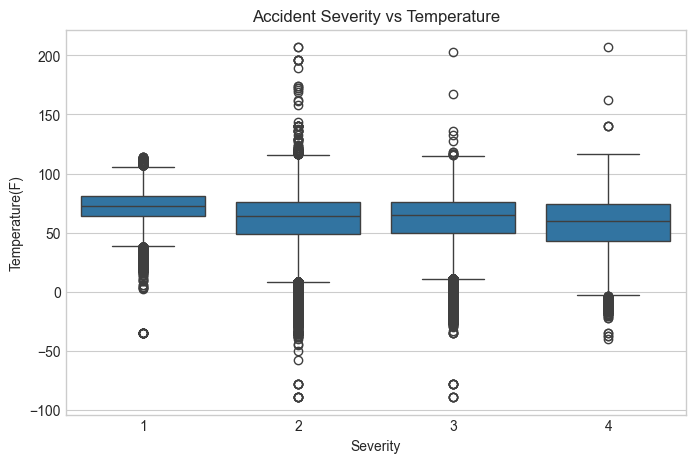

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title("Accident Severity vs Temperature")
plt.show()


## 9. Weather vs Severity Heatmap 🌧️🔥

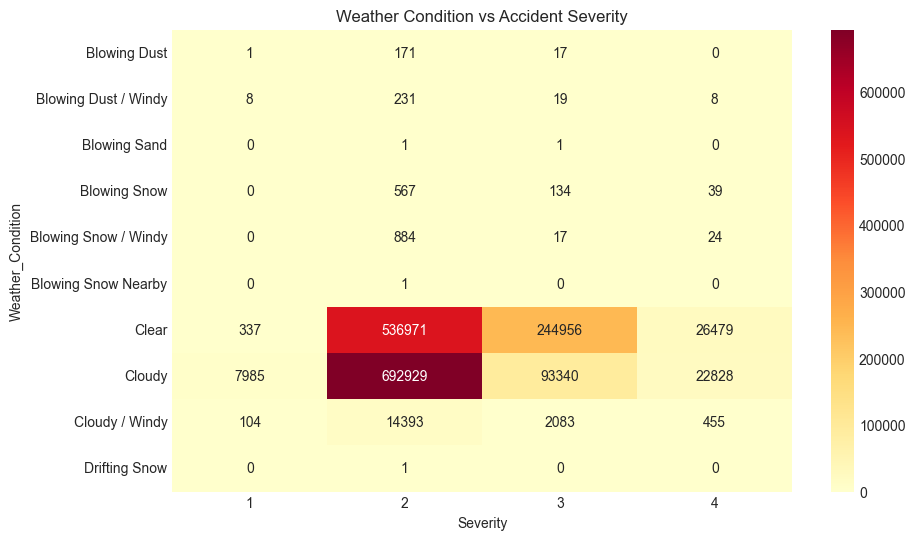

In [21]:
weather_severity = pd.crosstab(
    df['Weather_Condition'],
    df['Severity']
).head(10)

plt.figure(figsize=(10,6))
sns.heatmap(weather_severity, cmap='YlOrRd', annot=True, fmt='d')
plt.title("Weather Condition vs Accident Severity")
plt.show()


## 10. Hotspot Visualization (MAP) 🗺️

In [17]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[39.5, -98.35], zoom_start=4)

HeatMap(df[['Start_Lat', 'Start_Lng']].dropna().sample(5000)).add_to(m)

m


## 11. Improved Hotspot Map (Final Touch 🗺️)

In [22]:
from folium.plugins import HeatMap

map_accidents = folium.Map(location=[39.5, -98.35], zoom_start=4)

HeatMap(
    df[['Start_Lat','Start_Lng']].dropna().sample(8000),
    radius=8
).add_to(map_accidents)

map_accidents
